In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import gmaps
import os

#files to load
data_1 = "Resources/California_School_District_Areas_2019-20.csv"
data_2 = "Resources/California_School_District_Areas_2020-21.csv"

# Read Files and store into Pandas data frame
school_2019_df = pd.read_csv(data_1)
school_2021_df = pd.read_csv(data_2)

ModuleNotFoundError: No module named 'gmaps'

In [7]:
#check data frame data_1
school_2019_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,SHAPE_Length,SHAPE_Area
0,1,2019-20,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,PK,12,...,0,0.0,1303,11.5,3421,30.299999,3317,29.400000,56522.982848,-4.755489e+07
1,2,2019-20,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,0,0.0,317,8.8,658,18.299999,635,17.700001,12696.382778,-7.096327e+06
2,3,2019-20,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,0,0.0,1097,11.1,2789,28.299999,2673,27.200001,43695.341232,-4.364648e+07
3,4,2019-20,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,0,0.0,821,8.8,2121,22.799999,2036,21.799999,142492.767571,-2.838285e+08
4,5,2019-20,612630,161168,1611680000000,Alameda,Emery Unified,Unified,PK,12,...,0,0.0,73,10.1,521,72.300003,507,70.300003,13741.273106,-5.363392e+06


In [8]:
#check data frame data_2
school_2021_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,DistrctAreaSqMi,Shape__Area,Shape__Length
0,1,2020-21,601770,161119,1.611190e+12,Alameda,Alameda Unified,Unified,PK,12,...,0.0,1275,11.7,3202,29.3,3101,28.4,11.455570,4.755489e+07,56522.98268
1,2,2020-21,601860,161127,1.611270e+12,Alameda,Albany City Unified,Unified,KG,12,...,0.0,311,8.9,608,17.4,587,16.8,1.703654,7.096327e+06,12696.38280
2,3,2020-21,604740,161143,1.611430e+12,Alameda,Berkeley Unified,Unified,PK,12,...,0.0,1091,11.6,2563,27.2,2431,25.8,10.483362,4.364648e+07,43695.34154
3,4,2020-21,607800,161150,1.611500e+12,Alameda,Castro Valley Unified,Unified,PK,12,...,0.0,850,9.2,2067,22.5,1977,21.5,68.442604,2.838285e+08,142492.76760
4,5,2020-21,612630,161168,1.611680e+12,Alameda,Emery Unified,Unified,PK,12,...,0.0,69,9.9,561,80.4,555,79.5,1.289416,5.363392e+06,13741.27289


In [9]:
#eliminating columns data_1
#check the columns
# school_2019_df.columns

reduced_school_2019_df = school_2019_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount", "ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]


reduced_school_2019_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,80,7,26,2,146,652


In [10]:
##eliminating columns data_2
reduced_school_2021_df = school_2021_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount", "ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]
reduced_school_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,71,3,42,2,142,535


In [11]:
#rename columns to make it easier to read-2019 data
county_2019_df = reduced_school_2019_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2019_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,80,7,26,2,146,652


In [12]:
#rename columns to make it easier to read-2021 data
county_2021_df = reduced_school_2021_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,71,3,42,2,142,535


In [13]:
#reduce rows to 1 per county-2019
school_2019 = county_2019_df.groupby("CountyName").sum()
school_2019

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,43172,402,3062,989,24319,95233
Alpine,70,0,70,0,36,0,0,2,0,26,0,2,14,0,12,43
Amador,3958,0,3958,18,89,20,20,868,8,2633,121,19,75,0,523,1607
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,1900,247,1234,123,3558,17222
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,189,70,144,0,805,2511
Colusa,4698,0,4698,33,55,52,3,3729,9,768,1788,32,224,253,547,3673
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,27395,540,1974,12,20454,69751
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,263,50,158,0,567,2672
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,1949,131,560,0,3498,9447


In [14]:
#reduce rows to 1 per county-2021
school_2021 = county_2021_df.groupby("CountyName").sum()
school_2021

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,
Alameda,218094,19142,198952,18958,543,60791,9893,73527,2076,36056,40130,442,2825,855,24977,90679
Alpine,73,0,73,0,30,1,1,3,0,34,0,0,9,0,11,45
Amador,3889,0,3889,17,80,16,18,897,6,2553,101,23,118,0,750,1674
Butte,27794,2945,24849,559,592,1726,119,7198,86,15256,1822,245,829,67,3651,16940
Calaveras,4543,0,4543,30,74,30,15,1027,5,3059,182,40,100,0,760,2251
Colusa,4635,0,4635,35,58,51,4,3708,8,724,1778,28,363,237,553,3376
Contra Costa,166137,5791,160346,13914,501,22948,7043,60601,988,46402,24723,493,1821,10,20298,65844
Del Norte,3818,254,3564,25,548,173,20,879,3,1904,233,64,134,0,552,2523
El Dorado,28414,5305,23109,272,221,1155,412,5882,71,18700,1827,102,475,0,3528,8792


In [15]:
# school_2019.count()
# school_2021.count()
#do not need to drop any nulls

#confirmed that everything is an integer
# school_2019.dtypes
# school_2021.dtypes

In [16]:
#added year column back 
school_2019['Year'] = "2019-2020"
school_2021['Year'] = "2020-2021"
# school_2019.head()
# school_2021.head()

In [17]:
combined_data_df = pd.merge(school_2019, school_2021, how="outer", on=["CountyName"])
combined_data_df

,EnrollTotal_x,EnrollCharter_x,EnrollNonCharter_x,African American_x,American Indian_x,Asian_x,Filipino_x,Hispanic_x,Pacific Islander_x,White_x,...,Hispanic_y,Pacific Islander_y,White_y,English Learner_y,Foster Care_y,Homeless_y,Migrant_y,Students with Disabilities_y,Socioeconomically Disadvantaged_y,Year_y
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,73527,2076,36056,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,3,0,34,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,897,6,2553,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,7198,86,15256,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,1027,5,3059,182,40,100,0,760,2251,2020-2021
Colusa,4698,0,4698,33,55,52,3,3729,9,768,...,3708,8,724,1778,28,363,237,553,3376,2020-2021
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,...,60601,988,46402,24723,493,1821,10,20298,65844,2020-2021
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,...,879,3,1904,233,64,134,0,552,2523,2020-2021
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,...,5882,71,18700,1827,102,475,0,3528,8792,2020-2021


In [18]:
combined_data_df.columns

Index(['EnrollTotal_x', 'EnrollCharter_x', 'EnrollNonCharter_x',
       'African American_x', 'American Indian_x', 'Asian_x', 'Filipino_x',
       'Hispanic_x', 'Pacific Islander_x', 'White_x', 'English Learner_x',
       'Foster Care_x', 'Homeless_x', 'Migrant_x',
       'Students with Disabilities_x', 'Socioeconomically Disadvantaged_x',
       'Year_x', 'EnrollTotal_y', 'EnrollCharter_y', 'EnrollNonCharter_y',
       'African American_y', 'American Indian_y', 'Asian_y', 'Filipino_y',
       'Hispanic_y', 'Pacific Islander_y', 'White_y', 'English Learner_y',
       'Foster Care_y', 'Homeless_y', 'Migrant_y',
       'Students with Disabilities_y', 'Socioeconomically Disadvantaged_y',
       'Year_y'],
      dtype='object')

In [19]:
#rename variables

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_x": "EnrollTotal_2020", "EnrollCharter_x": "EnrollCharter_2020", "EnrollNonCharter_x": "EnrollNonCharter_2020",
       "African American_x": "African American_2020", "American Indian_x": "American Indian_2020" , "Asian_x": "Asian_2020", "Filipino_x": "Filipino_2020",
       "Hispanic_x": "Hispanic_2020", "Pacific Islander_x": "Pacific Islander_2020", "White_x": "White_2020", "English Learner_x": "English Learner_2020",
       "Foster Care_x": "Foster Care_2020", "Homeless_x": "Homeless_2020", "Migrant_x": "Migrant_2020",
       "Students with Disabilities_x": "Students with Disabilities_2020", "Socioeconomically Disadvantaged_x": "Socioeconomically Disadvantaged_2020", "Year_x": "Year:2020"})

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_y": "EnrollTotal_2021", "EnrollCharter_y": "EnrollCharter_2021", "EnrollNonCharter_y": "EnrollNonCharter_2021",
       "African American_y": "African American_2021", "American Indian_y": "American Indian_2021" , "Asian_y": "Asian_2021", "Filipino_y": "Filipino_2021",
       "Hispanic_y": "Hispanic_2021", "Pacific Islander_y": "Pacific Islander_2021", "White_y": "White_2021", "English Learner_y": "English Learner_2021",
       "Foster Care_y": "Foster Care_2021", "Homeless_y": "Homeless_2021", "Migrant_y": "Migrant_2021",
       "Students with Disabilities_y": "Students with Disabilities_2021", "Socioeconomically Disadvantaged_y": "Socioeconomically Disadvantaged_2021", "Year_y": "Year:2021"})
combined_data_df.head()                     

,EnrollTotal_2020,EnrollCharter_2020,EnrollNonCharter_2020,African American_2020,American Indian_2020,Asian_2020,Filipino_2020,Hispanic_2020,Pacific Islander_2020,White_2020,...,Hispanic_2021,Pacific Islander_2021,White_2021,English Learner_2021,Foster Care_2021,Homeless_2021,Migrant_2021,Students with Disabilities_2021,Socioeconomically Disadvantaged_2021,Year:2021
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,73527,2076,36056,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,3,0,34,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,897,6,2553,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,7198,86,15256,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,1027,5,3059,182,40,100,0,760,2251,2020-2021


In [20]:
combined_data_df.columns

Index(['EnrollTotal_2020', 'EnrollCharter_2020', 'EnrollNonCharter_2020',
       'African American_2020', 'American Indian_2020', 'Asian_2020',
       'Filipino_2020', 'Hispanic_2020', 'Pacific Islander_2020', 'White_2020',
       'English Learner_2020', 'Foster Care_2020', 'Homeless_2020',
       'Migrant_2020', 'Students with Disabilities_2020',
       'Socioeconomically Disadvantaged_2020', 'Year:2020', 'EnrollTotal_2021',
       'EnrollCharter_2021', 'EnrollNonCharter_2021', 'African American_2021',
       'American Indian_2021', 'Asian_2021', 'Filipino_2021', 'Hispanic_2021',
       'Pacific Islander_2021', 'White_2021', 'English Learner_2021',
       'Foster Care_2021', 'Homeless_2021', 'Migrant_2021',
       'Students with Disabilities_2021',
       'Socioeconomically Disadvantaged_2021', 'Year:2021'],
      dtype='object')

In [21]:
#confirming again there are no nulls
combined_data_df.count()

EnrollTotal_2020                        58
EnrollCharter_2020                      58
EnrollNonCharter_2020                   58
African American_2020                   58
American Indian_2020                    58
Asian_2020                              58
Filipino_2020                           58
Hispanic_2020                           58
Pacific Islander_2020                   58
White_2020                              58
English Learner_2020                    58
Foster Care_2020                        58
Homeless_2020                           58
Migrant_2020                            58
Students with Disabilities_2020         58
Socioeconomically Disadvantaged_2020    58
Year:2020                               58
EnrollTotal_2021                        58
EnrollCharter_2021                      58
EnrollNonCharter_2021                   58
African American_2021                   58
American Indian_2021                    58
Asian_2021                              58
Filipino_20

## Student Enrollment situation  pre-Covid vs. post-Covid

### Factor:  Students with Disabilities

In [22]:
# extract column
disable_df=pd.DataFrame(combined_data_df[["EnrollTotal_2019","Students with Disabilities_2019"\
                             ,"EnrollTotal_2021","Students with Disabilities_2021"]])

# add percentage column for 2019 and 2021
disable_df["percent_2019"] = round(disable_df["Students with Disabilities_2019"]/disable_df["EnrollTotal_2019"]*100,2)
disable_df["percent_2021"] = round(disable_df["Students with Disabilities_2021"]/disable_df["EnrollTotal_2021"]*100,2)

# calculate the average percentage difference
avgDiff = (disable_df["percent_2021"] - disable_df["percent_2019"]).sum()/len(disable_df)

# formatting the column
disable_df["percent_2021"] =disable_df["percent_2021"].map("%{:.2f}".format)
disable_df["percent_2019"] =disable_df["percent_2019"].map("%{:.2f}".format)

disable_df.head()

KeyError: "['EnrollTotal_2019', 'Students with Disabilities_2019'] not in index"

In [23]:
sum_2019 = disable_df["EnrollTotal_2019"].sum()
disableSum_2019 = disable_df["Students with Disabilities_2019"].sum()
percent_2019 = disableSum_2019/sum_2019*100 

sum_2021 = disable_df["EnrollTotal_2021"].sum()
disableSum_2021 = disable_df["Students with Disabilities_2021"].sum()
percent_2021 = disableSum_2021/sum_2021*100 

NameError: name 'disable_df' is not defined

In [24]:
# create summary data frame
disableSummary_df = pd.DataFrame({"Total Enrollment in 2019" : [sum_2019],
                                  "Total Enrollment of Students with Disabilities in 2019":[disableSum_2019],
                                  "Percent of Students with Disabilities in 2019" : [percent_2019],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021],
                                  "Percent of Students with Disabilities in 2021" : [percent_2021],
                                  "Average percentage differnce" : [avgDiff]
                                })

# fomatting columns
disableSummary_df["Percent of Students with Disabilities in 2019"]\
=disableSummary_df["Percent of Students with Disabilities in 2019"].map("%{:.2f}".format)

disableSummary_df["Percent of Students with Disabilities in 2021"]\
=disableSummary_df["Percent of Students with Disabilities in 2021"].map("%{:.2f}".format)

disableSummary_df["Average percentage differnce"]\
=disableSummary_df["Average percentage differnce"].map("%{:.2f}".format)

disableSummary_df

NameError: name 'sum_2019' is not defined

In [25]:
# create grouped barchart
df = pd.DataFrame({"Total Enrollment in 2019" : [sum_2019],
                   "Total Enrollment of Students with Disabilities in 2019":[disableSum_2019],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021]
                   })


ax = df.plot.bar()
plt.rcParams["figure.figsize"] = (12,7)
plt.title("Total Enrollment of Students with Disabilities 2019 vs. 2021", fontsize = 14)
plt.xlabel("Total Number & Number of Students with Disabilities", fontsize = 14)
plt.ylabel("Enrollment Number", fontsize = 14)
plt.savefig("Images/Disable.png")

NameError: name 'sum_2019' is not defined

### The average difference of _Students with Disabilities_ enrollment percentage between 2019 and 2021 is 0.83%.  The pandemic doesn't display a significant effect on overall enrollment of _Students with Disabilities_

 ### Factor:  Socioeconomically Disadvantaged

In [26]:
# extract column
social_df=pd.DataFrame(combined_data_df[["EnrollTotal_2019","Socioeconomically Disadvantaged_2019"\
                             ,"EnrollTotal_2021","Socioeconomically Disadvantaged_2021"]])

# add new columns for percentage 
social_df["percent_2019"] = round(social_df["Socioeconomically Disadvantaged_2019"]/social_df["EnrollTotal_2019"]*100,2)
social_df["percent_2021"] = round(social_df["Socioeconomically Disadvantaged_2021"]/social_df["EnrollTotal_2021"]*100,2)

# calculate average percentage difference
avgDiff_socio = (social_df["percent_2021"] - social_df["percent_2019"]).sum()/len(social_df)

# formatting columns
social_df["percent_2021"] = social_df["percent_2021"].map("%{:.2f}".format)
social_df["percent_2019"] = social_df["percent_2019"].map("%{:.2f}".format)
social_df.head()

KeyError: "['Socioeconomically Disadvantaged_2019', 'EnrollTotal_2019'] not in index"

In [27]:
socioDisadvan_2019 = social_df["Socioeconomically Disadvantaged_2019"].sum()
percentSocio_2019 = socioDisadvan_2019/sum_2019*100 

socioDisadvan_2021 = social_df["Socioeconomically Disadvantaged_2021"].sum()
percentSocio_2021 = socioDisadvan_2021/sum_2021*100 

NameError: name 'social_df' is not defined

In [28]:
# create summary data frame
socioSummary_df = pd.DataFrame({"Total Enrollment in 2019" : [sum_2019],
                                  "Total Enrollment of Socioeconomically Disadvantaged students 2019":[socioDisadvan_2019],
                                  "Percent of Socioeconomically Disadvantaged students in 2019" : [percentSocio_2019 ],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021],
                                  "Percent of Socioeconomically Disadvantaged students in 2021" : [percentSocio_2021],
                                  "Average percentage differnce" : [avgDiff_socio]
                                })

# formatting columns
socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2019"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2019"].map("%{:.2f}".format)

socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"].map("%{:.2f}".format)

socioSummary_df["Average percentage differnce"]\
=socioSummary_df["Average percentage differnce"].map("%{:.2f}".format)

socioSummary_df

NameError: name 'sum_2019' is not defined

In [29]:
index = ['2019', '2021']
df = pd.DataFrame({"Total Enrollment in 2019" : [sum_2019],
                   "Total Enrollment of Socioeconomically Disadvantaged students 2019":[socioDisadvan_2019],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021]
                   })

ax = df.plot.bar()
plt.rcParams["figure.figsize"] = (12,7)
plt.title("Total Enrollment of Socioeconomically Disadvantaged students 2019 vs. 2021", fontsize = 14)
plt.xlabel("Total Number & Number of Socioeconomically Disadvantaged students", fontsize = 14)
plt.ylabel("Enrollment Number", fontsize = 14)
ax.legend()
plt.savefig("Images/Socio.png")

NameError: name 'sum_2019' is not defined

### The average difference of _Socioeconomically Disadvantaged Students_ enrollment percentage between 2019 and 2021 is -0.41%.  The pandemic doesn't display a significant effect on overall enrollment of _Socioeconomically Disadvantaged Students_

##Foster Care Data

In [30]:
#reduce columns and added a percent column

foster_care_df = combined_data_df[["EnrollTotal_2020", "Foster Care_2020", "EnrollTotal_2021", "Foster Care_2021"]]
foster_care_df

foster_care_df["Percent Total 2020"] = (foster_care_df["Foster Care_2020"]/foster_care_df["EnrollTotal_2020"]*100)
foster_care_df["Percent Total 2021"] = (foster_care_df["Foster Care_2021"]/foster_care_df["EnrollTotal_2021"]*100)

foster_care_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"
        
    })


C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,EnrollTotal_2020,Foster Care_2020,EnrollTotal_2021,Foster Care_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,402,218094,442,0.180%,0.203%
Alpine,70,2,73,0,2.857%,0.000%
Amador,3958,19,3889,23,0.480%,0.591%
Butte,28777,247,27794,245,0.858%,0.881%
Calaveras,4885,70,4543,40,1.433%,0.880%
Colusa,4698,32,4635,28,0.681%,0.604%
Contra Costa,172089,540,166137,493,0.314%,0.297%
Del Norte,3981,50,3818,64,1.256%,1.676%
El Dorado,29489,131,28414,102,0.444%,0.359%


In [31]:
#did a sum of all rows, created a new data frame, formated numbers

total_foster_enrollment_2020 = foster_care_df["EnrollTotal_2020"].sum()
total_foster_2020 = foster_care_df["Foster Care_2020"].sum()
total_percent_2020 = total_foster_2020/total_foster_enrollment_2020*100

total_foster_enrollment_2021 = foster_care_df["EnrollTotal_2021"].sum()
total_foster_2021 = foster_care_df["Foster Care_2021"].sum()
total_percent_2021 = total_foster_2021/total_foster_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_foster_enrollment_2020],
    "Total Foster 2020": [total_foster_2020],
    "Percent of Foster 2020": [total_percent_2020],
    "Total Enrollment 2021": [total_foster_enrollment_2021],
    "Total Foster 2021": [total_foster_2021],
    "Percent of Foster 2021": [total_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Foster 2020": "{:,.2f}",
    "Percent of Foster 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Foster 2021": "{:,.2f}",
    "Percent of Foster 2021": "{:,.3f}%"
})



,Total Enrollment 2020,Total Foster 2020,Percent of Foster 2020,Total Enrollment 2021,Total Foster 2021,Percent of Foster 2021
0,"6,038,302.00","31,583.00",0.523%,"5,873,395.00","30,783.00",0.524%


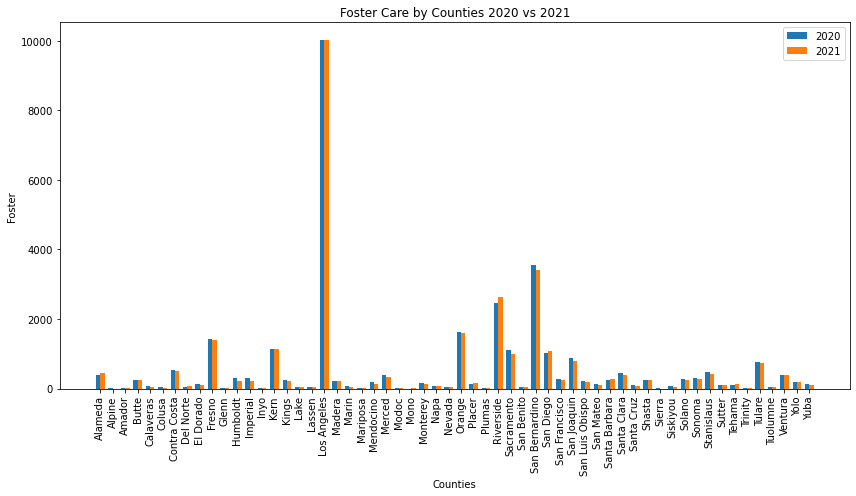

In [38]:
#created bar graph for foster enrollments

# type_enrollments = ["Total Foster 2020", "Total Foster 2021" ]
# enrollments = [31583, 30783]
# x_axis = np.arange(len(enrollments))

# plt.bar(x_axis, enrollments, align="center")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, type_enrollments)

# plt.title("Foster Care Enrollments 2020 vs 2021")
# plt.xlabel("Years")
# plt.ylabel("Enrollment Totals")

# # foster_chart = foster_graph.plot(kind='bar')

# # # Set the xlabel and ylabel using class methods
# # foster_chart.set_xlabel("Types of Enrollment")
# # foster_chart.set_ylabel("Enrollment #'s'")


# plt.show()
# # plt.tight_layout() 


#we decided to change it to show counties

foster_care_bar_df = combined_data_df.reset_index()
FC_2020 = foster_care_bar_df['Foster Care_2020']
FC_2021 = foster_care_bar_df['Foster Care_2021']
foster_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))
# dpi=300
fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Foster')
ax.set_xlabel('Counties')
ax.set_title('Foster Care by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.show()

Migrant Data##

In [42]:
migrant_df = combined_data_df[["EnrollTotal_2020", "Migrant_2020", "EnrollTotal_2021", "Migrant_2021"]]
migrant_df

migrant_df["Percent Total 2020"] = (migrant_df["Migrant_2020"]/migrant_df["EnrollTotal_2020"]*100)
migrant_df["Percent Total 2021"] = (migrant_df["Migrant_2021"]/migrant_df["EnrollTotal_2021"]*100)

migrant_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"
        
    })

C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\erika\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,EnrollTotal_2020,Migrant_2020,EnrollTotal_2021,Migrant_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,989,218094,855,0.444%,0.392%
Alpine,70,0,73,0,0.000%,0.000%
Amador,3958,0,3889,0,0.000%,0.000%
Butte,28777,123,27794,67,0.427%,0.241%
Calaveras,4885,0,4543,0,0.000%,0.000%
Colusa,4698,253,4635,237,5.385%,5.113%
Contra Costa,172089,12,166137,10,0.007%,0.006%
Del Norte,3981,0,3818,0,0.000%,0.000%
El Dorado,29489,0,28414,0,0.000%,0.000%


In [43]:
total_migrant_enrollment_2020 = migrant_df["EnrollTotal_2020"].sum()
total_migrant_2020 = migrant_df["Migrant_2020"].sum()
total_migrant_percent_2020 = total_migrant_2020/total_migrant_enrollment_2020*100 

total_migrant_enrollment_2021 = migrant_df["EnrollTotal_2021"].sum()
total_migrant_2021 = migrant_df["Migrant_2021"].sum()
total_migrant_percent_2021 = total_migrant_2021/total_migrant_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_migrant_enrollment_2020],
    "Total Migrant 2020": [total_migrant_2020],
    "Percent of Migrant 2020": [total_migrant_percent_2020],
    "Total Enrollment 2021": [total_migrant_enrollment_2021],
    "Total Migrant 2021": [total_migrant_2021],
    "Percent of Migrant 2021": [total_migrant_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Migrant 2020": "{:,.2f}",
    "Percent of Migrant 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Migrant 2021": "{:,.2f}",
    "Percent of Migrant 2021": "{:,.3f}%"
})


,Total Enrollment 2020,Total Migrant 2020,Percent of Migrant 2020,Total Enrollment 2021,Total Migrant 2021,Percent of Migrant 2021
0,"6,038,302.00","47,268.00",0.783%,"5,873,395.00","46,409.00",0.790%


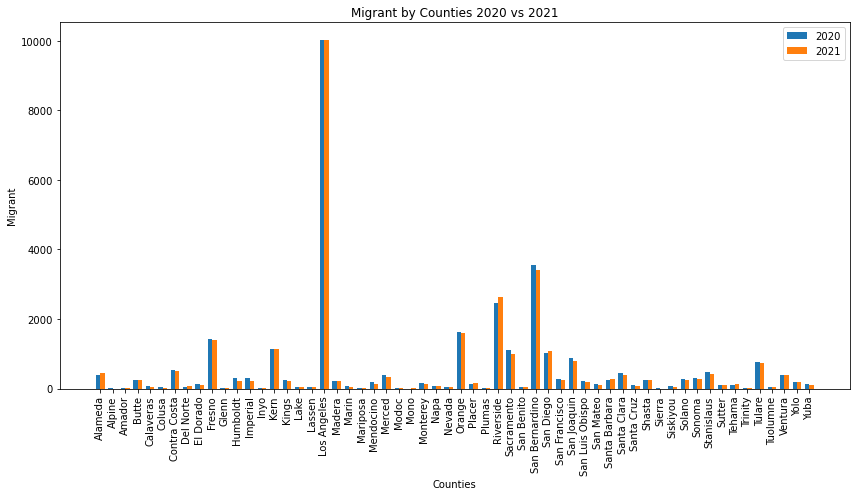

In [40]:
#created bar graph for migrant enrollments

# type_of_enrollments = ["Total Migrants 2020", "Total Migrants 2021" ]
# enrollment_numb = [47268, 46409]
# x_axis = np.arange(len(enrollments))

# plt.bar(x_axis, enrollment_numb, align="center")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, type_of_enrollments)

# plt.title("Migrant Enrollments 2020 vs 2021")
# plt.xlabel("Years")
# plt.ylabel("Enrollment Totals")

# # foster_chart = foster_graph.plot(kind='bar')

# # # Set the xlabel and ylabel using class methods
# # foster_chart.set_xlabel("Types of Enrollment")
# # foster_chart.set_ylabel("Enrollment #'s'")


# plt.show()

#we decided to change it to show counties

migrant_bar_df = combined_data_df.reset_index()
m_2020 = foster_care_bar_df['Migrant_2020']
m_2021 = foster_care_bar_df['Migrant_2021']
migrant_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))
# dpi=300
fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Migrant')
ax.set_xlabel('Counties')
ax.set_title('Migrant by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
# Files to load

data_3 = "Resources/covid19cases_test.csv"

# Read file and store into pandas data frame

COVID19_cases_df = pd.read_csv(data_3)

In [4]:
# Eliminating columns in data_3

reduced_COVID19_cases_df = COVID19_cases_df[["date", "area", "cumulative_positive_tests"]]
reduced_COVID19_cases_df

,date,area,cumulative_positive_tests
0,2020-02-01,Alameda,0
1,2020-02-02,Alameda,0
2,2020-02-03,Alameda,0
3,2020-02-04,Alameda,0
4,2020-02-05,Alameda,0
...,...,...,...
39889,2021-11-11,Yuba,11873
39890,2021-11-12,Yuba,11877
39891,2021-11-13,Yuba,11880
39892,2021-11-14,Yuba,11880


In [5]:
# Check the columns

reduced_COVID19_cases_df.columns

Index(['date', 'area', 'cumulative_positive_tests'], dtype='object')

In [8]:
# Rename columns to make it easier to read reduced_COVID19_cases data

CA_county_cases_df = reduced_COVID19_cases_df.rename(columns={"date": "Year",
                                                             "area" : "CountyName",
                                                             "cumulative_positive_tests": "Cumulative Positive Tests"})
CA_county_cases_df

,Year,CountyName,Cumulative Positive Tests
0,2020-02-01,Alameda,0
1,2020-02-02,Alameda,0
2,2020-02-03,Alameda,0
3,2020-02-04,Alameda,0
4,2020-02-05,Alameda,0
...,...,...,...
39889,2021-11-11,Yuba,11873
39890,2021-11-12,Yuba,11877
39891,2021-11-13,Yuba,11880
39892,2021-11-14,Yuba,11880


In [9]:
# Check the columns
CA_county_cases_df.columns

Index(['Year', 'CountyName', 'Cumulative Positive Tests'], dtype='object')

In [10]:
# Merging Education 2019-2021 data & California County COVID-19 Cumulative Positive cases

merge_df = pd.merge(combined_data_df, CA_county_cases_df, on="CountyName")
merge_df

NameError: name 'combined_data_df' is not defined

In [11]:
# Reduce the Combined Data Columns to make comparison between ethnic groups vs COVID-19 Cumulative Positive Cases 
# Ethnic groups to be selected will be African American, American Indian, Asian, Filipino, Hispanic, 
# Pacific Islander, and white. 

ethnic_df = combined_data_df[["African American_2019", "African American_2021", "American Indian_2019",
                             "American Indian_2019", "Asian_2019", "Asian_2021", "Filipino_2019",
                              "Filipino_2021", "Hispanic_2019", "Hispanic_2021", "Pacific Islander_2019",
                              "Pacific Islander_2021", "White_2019", "White_2021"
                             ]]
ethnic_df

NameError: name 'combined_data_df' is not defined